### Dependencies

In [15]:
import matplotlib as mpl
import matplotlib.lines as mlines
from matplotlib.ticker import FormatStrFormatter
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

new_rc_paramas = {
    'text.usetex' : True,
    'figure.dpi' : 180,
    'text.latex.preamble' : r'\usepackage{libertine}'r'\usepackage{libertinust1math}',
    'font.family' : 'Linux Libertine',
    'axes.titlesize' : 22,
    'axes.labelsize' : 18,
    'xtick.labelsize' : 16,
    'ytick.labelsize' : 16,
    'xtick.major.size' : 10,  # Change the length of the major xticks to 10
    'xtick.minor.size' : 5,
    'ytick.major.size' : 10,  # Change the length of the major xticks to 10
    'ytick.minor.size' : 5,
    'xtick.direction' : 'in',
    'ytick.direction' : 'in',
    'xtick.top' : True,
    'ytick.right' : True,
    'legend.fontsize' : 'large',
    'axes.linewidth' : 1.2,
    'savefig.bbox' : 'tight',
    'image.aspect' : 'equal',
}

import matplotlib.pyplot as plt

mpl.rcParams.update(new_rc_paramas)

import numpy as np

### Speedup

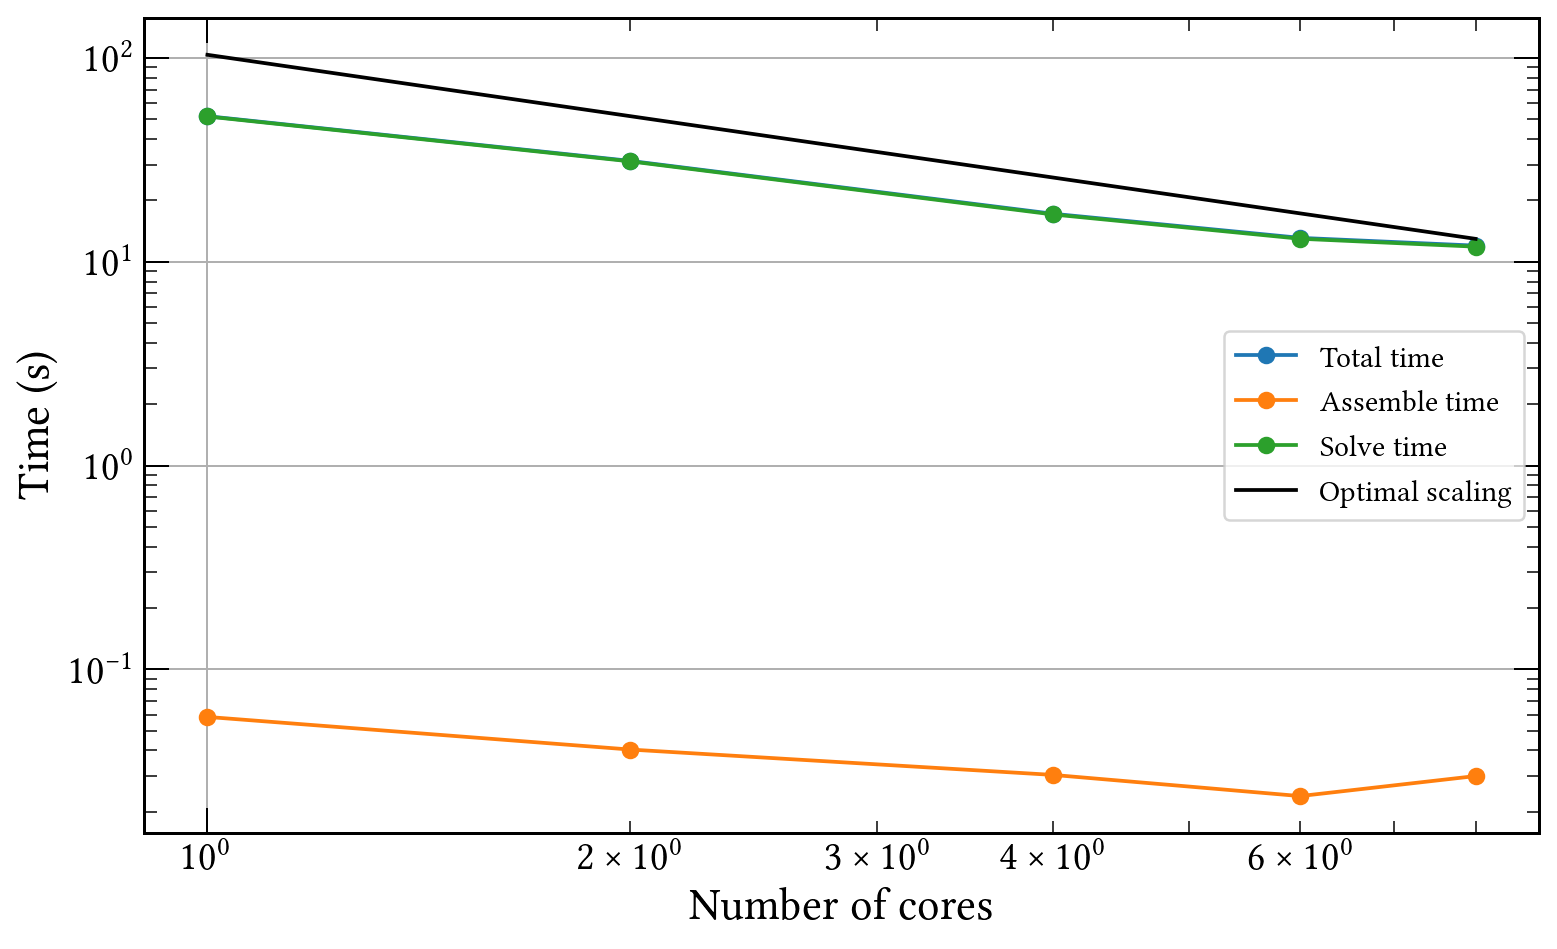

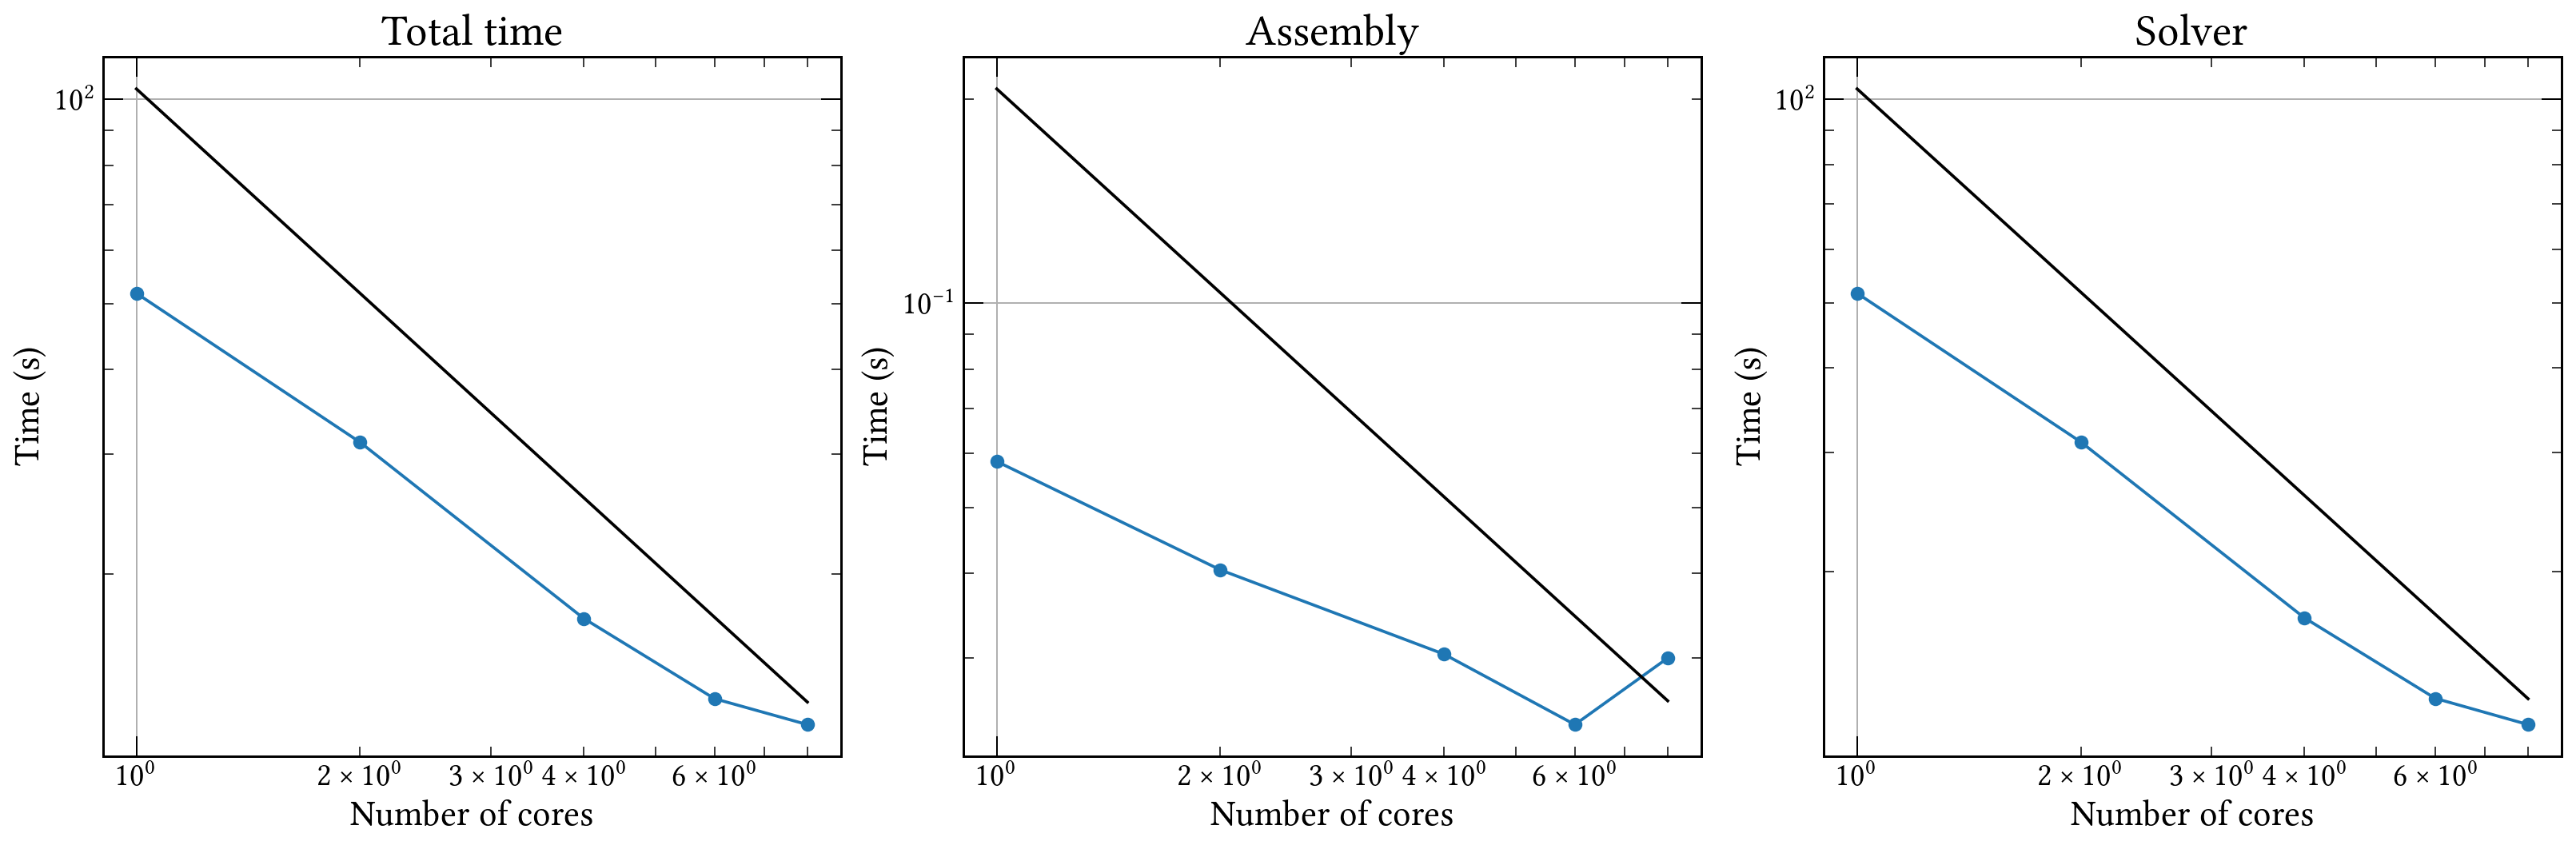

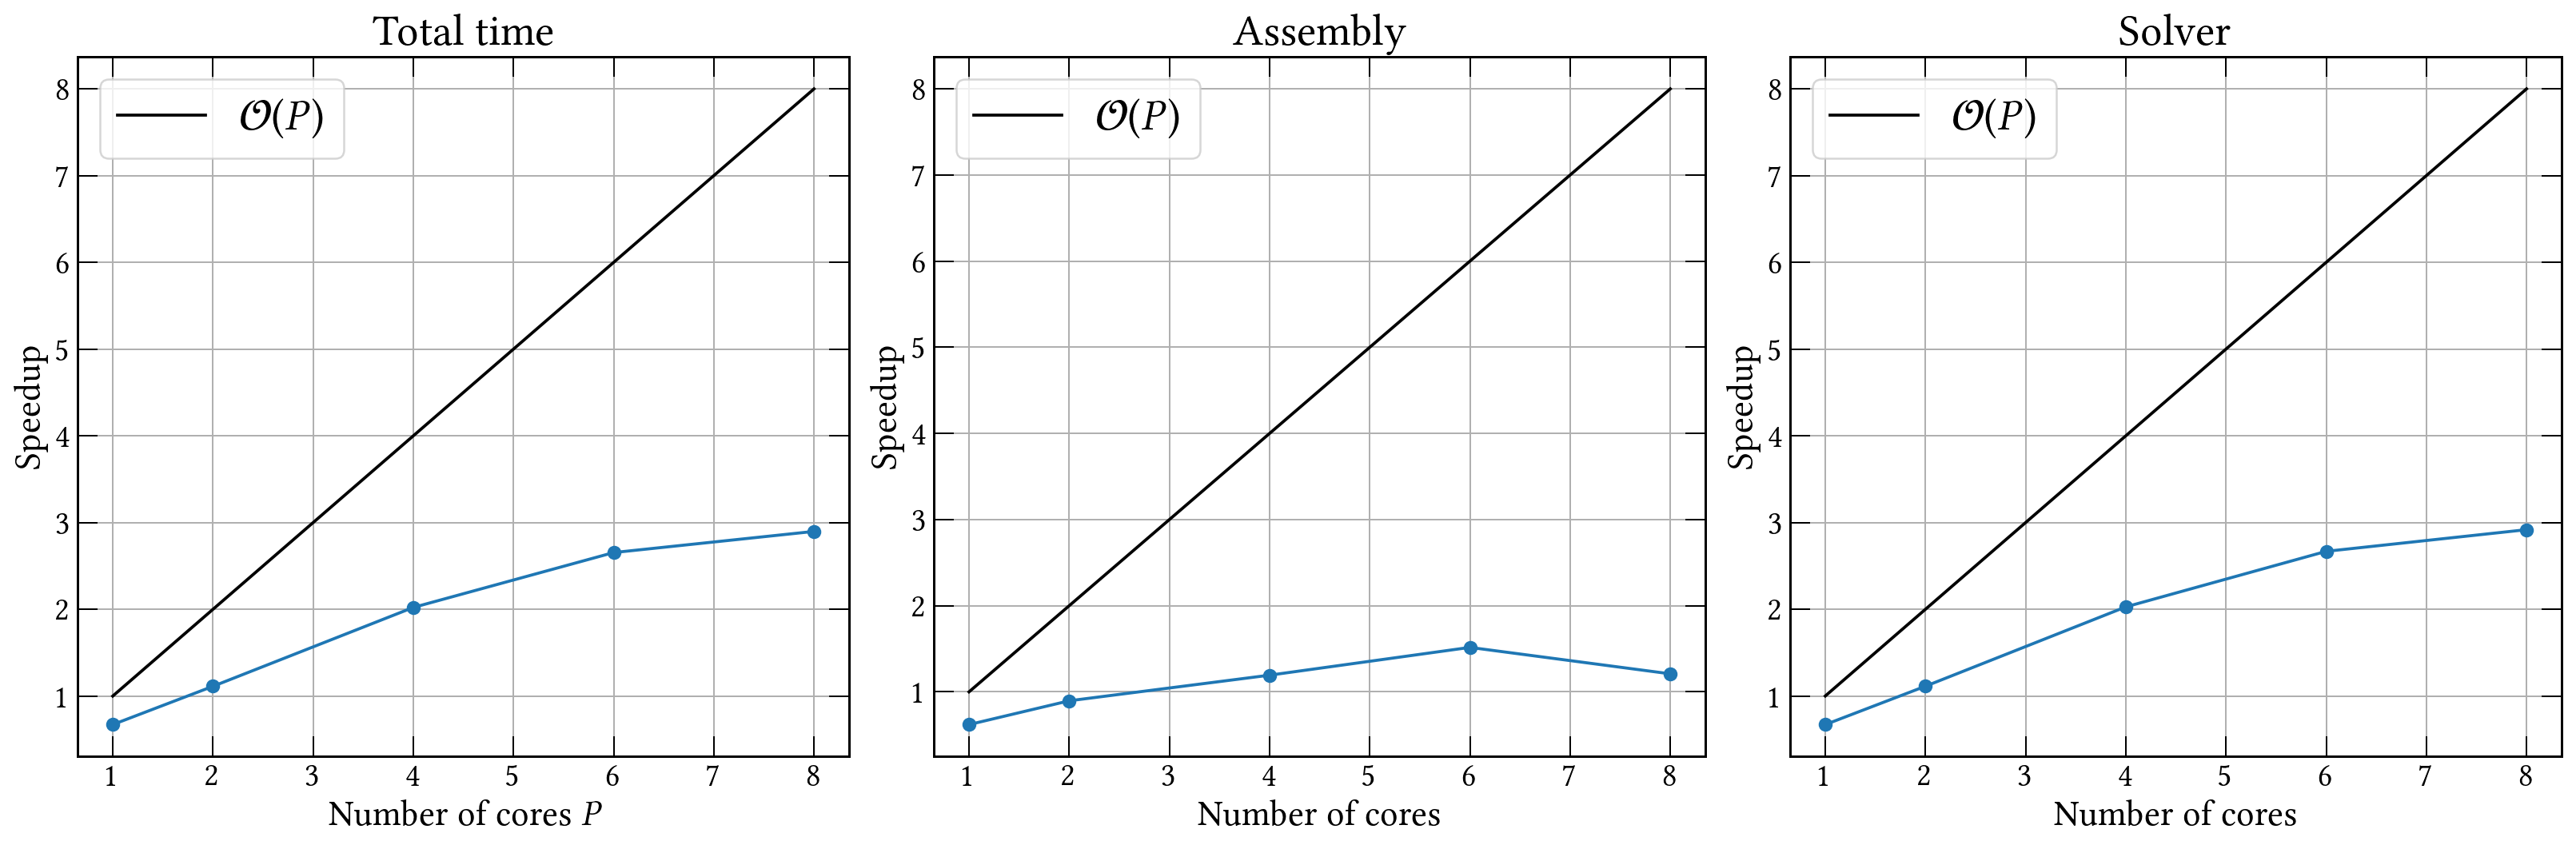

In [45]:
# measuring the cpu times for parallel vs serial code

# time measured in seconds

# solving 1D Poisson with strong Dirichlet BC with n = 1e6 elements

# run on Dardel using srun -n 2 -p shared -t 0:10:00 -A edu24.sf2568 ./main

# n = 1e5
"""
Final residual after 99255 iterations: 9.75205e-11
Solution written to solution_0.dat
Elapsed total time: 377.887 s
Assemble time: 0.135746 s
Solve time: 377.627 s
Output time: 0.124334 s
"""

# n = 5e4
time_total    = [42.2555, 21.692, 16.3001, 13.4213, 12.2837, 10.1923]
time_assemble = [0.051415, 0.039773, 0.029019, 0.026095, 0.024051, 0.023914]
time_solve    = [42.0412, 21.1052, 15.9033, 13.062, 11.8742, 9.81678]
time_output   = [0.162902, 0.548023, 0.367887, 0.30083, 0.386122, 0.352233]
cores = [1, 2, 3, 4, 5, 6]
cores_double = [1, 2, 4]

# n = 5e4 on linux
time_total    = [51.8153,   31.2631,   17.2031,   13.1025,   12.0003]
time_assemble = [0.0584345, 0.0404228, 0.0303543, 0.0238965, 0.0299609]
time_solve    = [51.6235,   31.0936,   17.066,    12.9692,   11.859]
time_output   = [0.133391,  0.129094,  0.106939,  0.109587,  0.113849]

cores = [1, 2, 4, 6, 8]
cores_double = [1, 2, 4, 8]

serial_time_total = 34.7809
serial_time_assemble = 0.0362346
serial_time_solve = 34.6011
serial_time_output = 0.143556


# n = 1e5 (running on my linux)

# time_total = [288.031, 175.513, 104.053, 89.2959, 84.9752, 93.5354, 114.276]
# time_assemble = [0.119022, 0.0784437, 0.0563041, 0.053848, 0.0600935, 0.0666746, 0.0798401]
# time_solve = [287.642, 175.204, 103.783, 89.0468, 84.7024, 93.2474, 113.968]
# time_output = [0.269279, 0.230441, 0.214964, 0.196814, 0.215751, 0.227179, 0.243356]

# cores = [1, 2, 4, 6, 8, 10, 12]

# linear decrease in time with number of cores
#time_linear = np.array([2*time_total[0] / (i + 1) for i in range(len(cores))])

# linear decrease in time with number of cores
#time_linear = np.array([time_total[0] / (i + 1) for i in range(len(cores))])

time_linear = np.array([2*time_total[0]*0.5**i for i in range(len(cores_double))])

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.loglog(cores, time_total, marker='o', label='Total time')
ax.loglog(cores, time_assemble, marker='o', label='Assemble time')
ax.loglog(cores, time_solve, marker='o', label='Solve time')
ax.loglog(cores_double, time_linear, label='Optimal scaling', color="black")

ax.set_xlabel('Number of cores')
ax.set_ylabel('Time (s)')
ax.legend()
ax.grid()
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

ax1.set_title('Total time')
ax1.loglog(cores, time_total, marker='o')
ax1.loglog(cores_double, time_linear, label='Optimal scaling', color="black")
ax1.set_xlabel('Number of cores')
ax1.set_ylabel('Time (s)')
ax1.grid()

ax2.set_title('Assembly')
ax2.loglog(cores, time_assemble, marker='o')
ax2.loglog(cores_double, 2e-3*time_linear, label='Optimal scaling', color="black")
ax2.set_xlabel('Number of cores')
ax2.set_ylabel('Time (s)')
ax2.grid()

ax3.set_title('Solver')
ax3.loglog(cores, time_solve, marker='o')
ax3.loglog(cores_double, time_linear, label='Optimal scaling', color="black")
ax3.set_xlabel('Number of cores')
ax3.set_ylabel('Time (s)')
ax3.grid()

fig.tight_layout()
plt.show()


# compute speedup
speedup_total = serial_time_total / np.array(time_total)
speedup_assemble = serial_time_assemble / np.array(time_assemble)
speedup_solve = serial_time_solve / np.array(time_solve)
speedup_output = serial_time_output / np.array(time_output)
speedup_optimal = np.array(cores_double)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

ax1.set_title('Total time')
ax1.plot(cores, speedup_total, marker='o')
ax1.plot(cores_double, speedup_optimal, label=r'$\mathcal{O}(P)$', color="black")
ax1.set_xlabel(r'Number of cores $P$')
ax1.set_ylabel('Speedup')
ax1.grid()
ax1.legend(fontsize=22)

ax2.set_title('Assembly')
ax2.plot(cores, speedup_assemble, marker='o')
ax2.plot(cores_double, speedup_optimal, label=r'$\mathcal{O}(P)$', color="black")
ax2.set_xlabel('Number of cores')
ax2.set_ylabel('Speedup')
ax2.grid()
ax2.legend(fontsize=22)

ax3.set_title('Solver')
ax3.plot(cores, speedup_solve, marker='o')
ax3.plot(cores_double, speedup_optimal, label=r'$\mathcal{O}(P)$', color="black")
ax3.set_xlabel('Number of cores')
ax3.set_ylabel('Speedup')
ax3.grid()
ax3.legend(fontsize=22)

fig.tight_layout()
plt.show()

# compute efficiency
efficiency_total = speedup_total / np.array(cores)
efficiency_assemble = speedup_assemble / np.array(cores)
efficiency_solve = speedup_solve / np.array(cores)
efficiency_output = speedup_output / np.array(cores)



